# Image chunking and stitching with Dask

Dask is often used for parallel processing of large data that does not fit the GPU. We shall see in this notebook how we can load a 3D image, chunk it to any shape we want and pass the chunks for processing to any function we define. After processing we get back the processed stitched image.

In [2]:
!pip install scikit-image==0.18.1

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import dask
import dask.array as da
from skimage import exposure, io, util
from skimage.data import cells3d


In [40]:
data = util.img_as_float(cells3d()[:, 1, :, :])#load the 3D cell images from skimage
z,y,x=data.shape#getting image shape
print(z,y,x)
print(data.ndim)
print(data.dtype)

60 256 256
3
float64


In [41]:
arr = da.from_array(data, chunks=(60,128,128))# creating dask arrays from the image of shape z,y,x: 60,128,128 that is 4 chunks

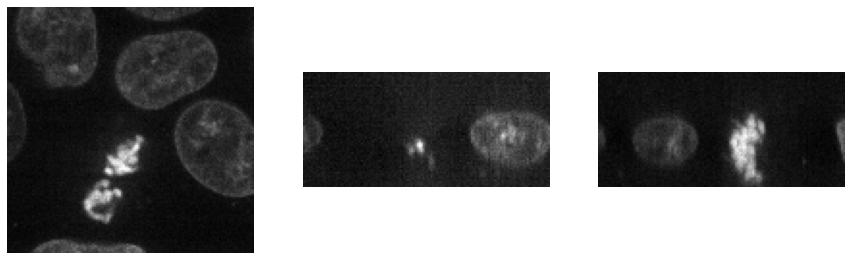

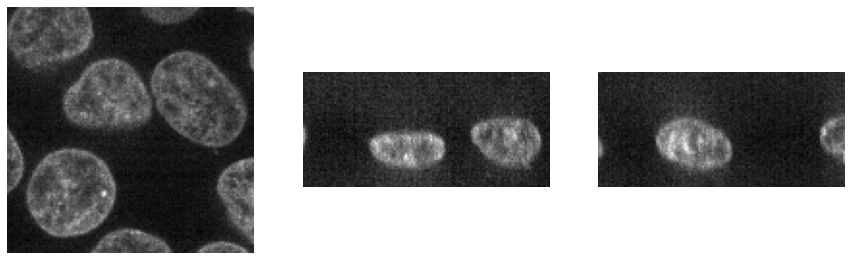

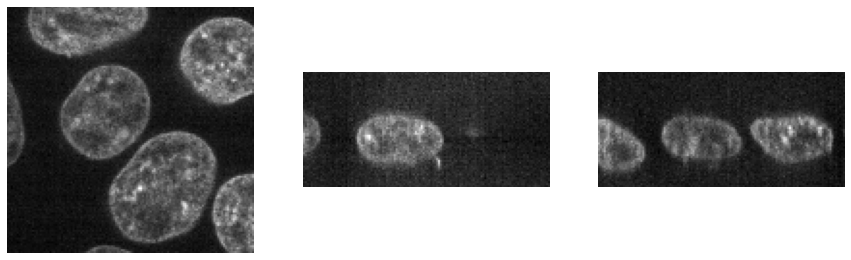

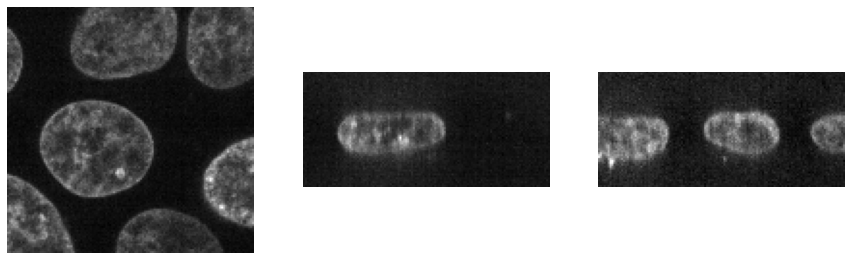

In [42]:

# view planes of 3D image
def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")
    
#view the chunk's planes
def image_view(chunk):
  if(chunk.shape[0]!=0):#to eliminate initializing empty chunk
    (n_plane, n_row, n_col) = chunk.shape
    _, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

    show_plane(a, chunk[n_plane // 2])
    show_plane(b, chunk[:, n_row // 2, :])
    show_plane(c, chunk[:, :, n_col // 2])
    return chunk #it's very important to return the data


result_blocks = arr.map_blocks(image_view,dtype='float32').compute(num_workers=1)# dask map_blocks used to map chunks to user defined function

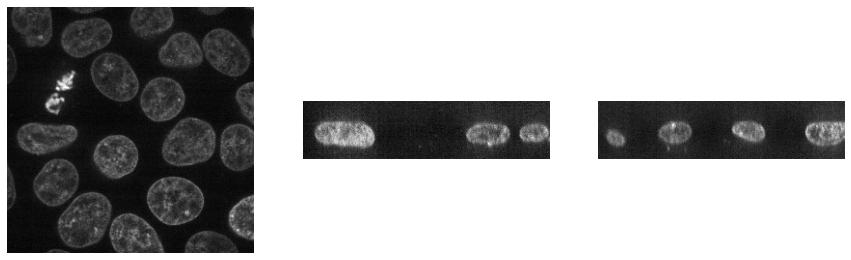

In [43]:
#display the result of map_blocks which gives back the stitched image
(n_plane, n_row, n_col) = result_blocks.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, result_blocks[n_plane // 2])
show_plane(b, result_blocks[:, n_row // 2, :])
show_plane(c, result_blocks[:, :, n_col // 2])